# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wan Aufa Azis
- **Email:** aziswan02@gmail.com
- **ID Dicoding:** wan_aufa_azis_Co3N

## Menentukan Pertanyaan Bisnis

Dataset yang digunakan pada proyek analisis ini adalah data penjualan, customer, serta seller dari sebuah e-commerce. Dari data tersebut,  
muncul beberapa pertanyaan bisnis sebagai berikut:
- Bagaimana performa penjualan e-commerce selama beberapa bulan terakhir?
- Produk apa yang paling banyak dan sedikit terjual?
- Bagaimana persebaran daerah dari customer yang kita miliki?

## Import Semua Packages/Library yang Digunakan

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

In [90]:
# Load data customers
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [91]:
# Load data orders
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [92]:
# Load data order_items
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [93]:
# Load data products
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [94]:
# Load data products_category
products_category_df = pd.read_csv('data/product_category_name_translation.csv')
products_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [95]:
# Load data sellers
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [96]:
# Load data geolocation
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

Menilai tabel `customers_df`

In [97]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [98]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [99]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Dari penilaian data customer, tidak terdapat null value pada tabel serta tidak ada duplikasi pada data. Data pada tabel customer juga tidak banyak type data numerik sehingga tidak ada keanehan pada sebaran nilainya.

Menilai tabel `orders_df`

In [100]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [101]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat beberapa nilai yang kosong pada tabel orders, terutama untuk kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`

In [102]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [103]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel `order_items_df`

In [104]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [105]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [106]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


terdapat item dengan harga barang yang cukup tinggi sampai 6735.00, dan harga barang terendah 0.85. Data perlu dilihat lebih lanjut 

In [107]:
#Mencari data yang memiliki nilai price melebihi quartile 75%
order_items_df[order_items_df['price'] > order_items_df['price'].quantile(0.75)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
...,...,...,...,...,...,...,...
112634,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112637,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.90,44.02
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41


ternyata cukup banyak data yang memiliki nilai lebih tinggi dari quartile 75% nya, sehingga data price max yang dimiliki masih terbilang cukup wajar

Menilai tabel `products_df`

In [108]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [109]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

terdapat beberapa data yang null value pada tabel product

In [110]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [111]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai tabel `sellers_df`

In [112]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [113]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [114]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Menilai tabel `geolocations_df`

In [115]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [116]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [117]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


terdapat beberapa data duplikat pada tabel geolocation

### Cleaning Data

Membersihkan tabel `orders_df` dari null value

In [118]:
orders_df[orders_df.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


beberapa data yang kosong hanya terletak pada kolom-kolom yang menandakan order_delivered sehingga tidak terlalu berpengaruh dengan analysis yang ingin dibuat. Maka dari itu data lebih baik dibiarkan saja sehingga tidak menghilangkan informasi penting yang dimiliki oleh data tersebut

Membersihkan tabel `products_df` dari null value

In [119]:
products_df[products_df.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


seperti pada data orders, data products yang hilang juga hanya pada kolom-kolom non-numeric sehingga tidak terlalu berpengaruh dalam menjawab pertanyaan analysis/bisnis yang ingin kita lakukan

Membersihkan tabel `geolocations_df` dari duplikasi data

In [120]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [121]:
geolocation_df.drop_duplicates(inplace=True)

In [122]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [123]:
#restart index geolocation_df
geolocation_df.reset_index(drop=True, inplace=True)
geolocation_df[:50]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


data geolocations kini sudah tidak memiliki duplicate value lagi

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [124]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23900,faa9633934fdf587270c2dbef19157e9,4d5915fe06858abbb2ba296233c78fe9,13332,indaiatuba,SP
52113,6b0fafb93f2ffe553ee4226de796542a,ea8bdf937b5ceae8fbaa953862dda224,13061,campinas,SP
7188,2829fe86387c0b79dca569d745617847,60a8028f57ccc179fce9ad57b5dc9ab3,95180,farroupilha,RS
88726,d2dc6bcab2d5200c7df05b609db1b1d8,9394f9f2e04e9d3316d930eb8f49f7cd,3309,sao paulo,SP
33761,13208e52f365a5397f177b4b4120c895,98d09a4203b52454142ad4dee48c4281,4023,sao paulo,SP


In [125]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [126]:
customers_df.groupby('customer_state').customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

dari data tersebut, dapat dilihat bahwa data customer yang kita miliki memiliki customer_id yang unique. customer yang ada juga tinggal di sekitar 4000 kota yang berbeda yang tersebar di 27 negara bagian dengan mayoritas customer tinggal di state SP

In [127]:
customers_df.groupby('customer_city').customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

persebaran kota yang ditinggali customer juga sangat beragam dengan customer paling banyak tinggal di kota sao paulo

### Explore `orders_df`

In [128]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
54527,04eef545c54d444825c506ba170a26bd,c5a0073d6661564548122a1570ede3b0,delivered,2017-04-24 19:29:09,2017-04-24 19:45:16,2017-04-25 10:36:56,2017-05-26 12:39:56,2017-05-15 00:00:00
60334,e573bcbd71e063eb151e44500cd89360,9b6d99e4fad63c0af01caa003bf8227b,delivered,2018-03-07 13:46:57,2018-03-07 14:09:09,2018-03-08 19:04:37,2018-03-26 17:45:40,2018-03-23 00:00:00
62300,62977d4590bfc4beeeada22ce07ae17b,532007b4b7629c6cd70fdd58e963f11b,delivered,2018-08-19 21:59:49,2018-08-20 13:30:54,2018-08-23 09:21:00,2018-08-27 17:54:42,2018-09-28 00:00:00
36628,c25173539a29a9b22d85fefd55e89a85,4b6c2bd9ec09807a1c830a493dae08f1,delivered,2017-07-11 11:50:22,2017-07-11 12:15:12,2017-07-13 21:54:58,2017-07-19 18:03:41,2017-07-26 00:00:00
68252,868368a37fa61f7147c73d271f0f7d81,c0f69e5b64bd59d051167278a16b1362,delivered,2018-01-11 19:54:27,2018-01-11 20:07:28,2018-01-15 17:59:20,2018-01-27 14:25:09,2018-02-06 00:00:00


In [129]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

terdapat beberapa order yang di canceled atau masih dalam tahap shipped. untuk melihat performa penjualan e-commerce, data yang kita lihat hanya data yang sudah didelivered agar lebih valid

In [130]:
orders_delivered_df = orders_df[orders_df['order_status'] == 'delivered']
orders_delivered_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
86911,12994c8b16a5e15fbbecf653c20a0a39,04bbdc3ac9295507b111d49f4d110eb1,delivered,2017-05-31 00:51:26,2017-05-31 01:30:15,2017-06-01 13:33:29,2017-06-06 16:47:32,2017-06-27 00:00:00
15043,073f64b0ac2c4ba51efd4327faca2d39,cf59457e10b5553577503d3039b1ad7f,delivered,2017-08-05 17:47:16,2017-08-05 18:03:29,2017-08-07 17:52:01,2017-08-16 19:45:42,2017-08-29 00:00:00
30603,0b9585496a9549d76a405252c9a5a027,033f6866f9435a8fe0bca6b54666f543,delivered,2018-03-12 16:48:03,2018-03-12 17:10:03,2018-03-13 19:32:29,2018-03-20 21:26:46,2018-03-28 00:00:00
37039,6aa761d20ab1c766a9fd060abd448f77,9690bb6edd4844dad4b5ffea8a4997c3,delivered,2018-08-16 22:57:11,2018-08-18 02:50:29,2018-08-21 14:49:00,2018-08-24 14:33:47,2018-09-05 00:00:00
20535,19230cac8f45f89fc992b4048422b72e,f859fb23e2e8315da5d17d72d4f372f5,delivered,2018-02-25 17:19:58,2018-02-25 17:30:27,2018-02-26 23:44:18,2018-03-06 18:41:30,2018-03-19 00:00:00


In [131]:
orders_delivered_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96478,96478,96478,96478,96464,96476,96470,96478
unique,96478,96478,1,95956,88274,80106,95658,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,507


### Explore `order_items_df`

In [132]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
92590,d209d8b7e741f8ce447b0173e579e3a4,1,9bb8ca338e5588c361e34eae02e8fad6,620c87c171fb2a6dd6e8bb4dec959fc6,2018-02-08 19:45:25,59.9,12.48
93677,d44d3aabe5fd82754ca3b4696cdc90e7,1,816f6efbb3598f798900557f628e8a56,2bf6a2c1e71bbd29a4ad64e6d3c3629f,2018-05-16 12:10:43,738.0,24.14
22312,32fea6db74ff9bb6c713d23f7328bfd3,3,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-02-21 19:50:29,49.9,17.60
22329,3304c0c857a9c77a201a551f5a3cacb8,4,7bbc646134de228a74392d8407d16df8,ddd51ae8cda92f3995a51fc0f0f3eec7,2017-05-10 13:10:46,34.9,9.34
45732,67d7d2f069a2b83e36ab0304e03132e6,1,55729c65a6d4638ba2d0fabc0ad9e571,ea65d8b58316a6f2362f2a9e4b3e86ad,2018-08-20 16:31:27,52.9,23.17


In [133]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


### Explore `orders_delivered_df` & `order_items_df`

In [134]:
orders_delivered_items_df = pd.merge(
    left=orders_delivered_df,
    right=order_items_df,
    how='inner',
    on='order_id'
)
orders_delivered_items_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
109270,7d07691d1f5e176e6f813a87eb0dc00c,d0e67c1c3a2d11850ad41a64dc5189f2,delivered,2018-02-24 18:58:01,2018-02-24 19:08:16,2018-03-12 21:25:45,2018-03-19 23:38:41,2018-03-20 00:00:00,1,e53e557d5a159f5aa2c5e995dfdf244b,88460e8ebdecbfecb5f9601833981930,2018-03-01 19:08:16,74.9,13.93
54117,3461c4b04fb9c6ecc30aee1e099bd1e1,7700eadddc5206fa9e00bd2868f08d14,delivered,2017-02-01 23:18:46,2017-02-03 03:45:15,2017-02-04 07:22:16,2017-02-09 10:57:43,2017-03-02 00:00:00,1,33202a8e7a645388c41ed714203d7131,8d79c8a04e42d722a75097ce5cbcf2ef,2017-02-07 23:18:46,149.9,17.20
46138,448645ea240ea7aa0dcc61d2cad9eb5d,f13fded6c65a073bdbfc42663acb4e1b,delivered,2017-11-14 12:43:37,2017-11-14 12:56:06,2017-11-27 13:20:13,2017-12-04 15:52:14,2017-12-13 00:00:00,1,852f63621d87c7e78bfc4246a251e11f,a425f92c199eb576938df686728acd20,2017-11-27 12:56:06,27.0,7.89
64007,de5518f86eca3ccfc00bb9ba13cdfffe,97300b8bea30b34f84ac6b6244ebeb55,delivered,2018-06-27 10:45:14,2018-06-27 11:16:06,2018-06-28 13:03:00,2018-07-06 12:54:56,2018-07-30 00:00:00,1,0cad3c9a114203d74ff1ca303486f205,39a5005f2605cbdb4f9ac14485cabfd1,2018-07-03 11:16:06,120.0,96.71
76723,ab76aedb67702363009523f1a9bc78ab,3d529d95e05b65b487203e06b63db28c,delivered,2018-07-30 14:40:59,2018-07-30 15:20:10,2018-07-31 13:32:00,2018-08-07 22:46:45,2018-08-22 00:00:00,1,461f43be3bdf8844e65b62d9ac2c7a5a,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-02 15:20:10,138.0,19.07


mari kita lihat produk apa yang paling banyak terjual dengan order_status delivered

In [135]:
orders_delivered_items_df.groupby('product_id').size().sort_values(ascending=False)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    520
422879e10f46682990de24d770e7f83d    484
99a4788cb24856965c36a24e339b6058    477
389d119b48cf3043d311335e499d9c6b    390
368c6c730842d78016ad823897a372db    388
                                   ... 
6d1552d60826f1b026c844b0501c2058      1
6d14f72afff32795290f2df6507f063c      1
6d12af216c3a452ad40ca5ccb6f15929      1
6d0d465294cd2cb44aea084f34405967      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Length: 32216, dtype: int64

untuk mengetahui kategori dari setiap product_id, kita akan menggabungkannya dengan products_df

### Explore `products_df` & `products_category_df`

In [136]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3223,2d8b38d9f3b8fc6659cd5aa565ec6e7c,telefonia,42.0,444.0,2.0,200.0,16.0,2.0,11.0
19317,44414d55ce2808a7b8f3568a92d1484f,ferramentas_jardim,56.0,1575.0,1.0,3763.0,49.0,45.0,34.0
3987,69c3a9ec3f1094ad11505df27ddad569,beleza_saude,53.0,713.0,2.0,150.0,20.0,10.0,20.0
2359,78efe838c04bbc568be034082200ac20,moveis_decoracao,57.0,272.0,1.0,2500.0,40.0,10.0,30.0
28967,343ebd86f51d5d5dc72592030d0ef74e,livros_interesse_geral,21.0,1882.0,1.0,1600.0,25.0,6.0,18.0


In [137]:
products_category_df.sample(5)

,product_category_name,product_category_name_english
12,papelaria,stationery
15,telefonia_fixa,fixed_telephony
68,fraldas_higiene,diapers_and_hygiene
24,climatizacao,air_conditioning
46,artes,art


In [138]:
products_category_name_df = pd.merge(
    left=products_df,
    right=products_category_df,
    how='inner',
    on='product_category_name'
)
products_category_name_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
15724,089cc17c8bf2226d13648392e33dabd7,informatica_acessorios,32.0,999.0,3.0,225.0,17.0,5.0,20.0,computers_accessories
8184,4df4e2fa82369cf0ba8bb28833d44848,moveis_decoracao,49.0,199.0,4.0,650.0,19.0,20.0,15.0,furniture_decor
20633,39849897ee574a067adeb72b6c8e84fa,ferramentas_jardim,38.0,693.0,1.0,320.0,16.0,13.0,18.0,garden_tools
17850,8e6e09d38503b28b4d2f3f0450bd6fc9,beleza_saude,58.0,775.0,1.0,250.0,16.0,10.0,20.0,health_beauty
13435,fcb300f1ac9a1231f70f3d2be2db9af2,cama_mesa_banho,50.0,475.0,1.0,700.0,16.0,40.0,30.0,bed_bath_table


### Explore `orders_delivered_items_df` & `products_category_name_df`

In [139]:
orders_delivered_items_products_df = pd.merge(
    left=orders_delivered_items_df,
    right=products_category_name_df,
    how='inner',
    on='product_id'
)
orders_delivered_items_products_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
4162,ebc613372bc147f1df63ad340e4b9bf5,db508645c64a215d060fefdf9610784b,delivered,2017-08-30 14:52:57,2017-08-31 17:05:38,2017-09-01 19:11:47,2017-09-13 16:17:37,2017-10-05 00:00:00,1,461f43be3bdf8844e65b62d9ac2c7a5a,...,26.47,relogios_presentes,35.0,591.0,3.0,444.0,20.0,14.0,16.0,watches_gifts
33772,7921190dc054e6839a4cfc253a578377,07bb08bd7097f09f2468ea420756160f,delivered,2017-10-11 12:01:42,2017-10-11 12:14:13,2017-10-11 20:20:00,2017-10-17 15:37:03,2017-10-24 00:00:00,1,0b6a32b32a7dc68b12e8a0e0805c44d5,...,8.63,relogios_presentes,50.0,542.0,1.0,190.0,16.0,11.0,12.0,watches_gifts
97275,923bd0dbdf3223a889b7548f25d973fc,2225cd8a014f6e1c1bbdab7ee5de2aa3,delivered,2017-08-09 13:04:46,2017-08-09 13:15:16,2017-08-15 21:33:56,2017-08-16 20:23:35,2017-08-22 00:00:00,1,af958790ccbac40ab33fc75971df69b1,...,11.95,esporte_lazer,40.0,1439.0,1.0,950.0,45.0,35.0,20.0,sports_leisure
56513,01d13850e74efca9a86fe812940de070,efc248b5fcc421d31a203cf79d92ecc2,delivered,2018-04-12 11:38:28,2018-04-13 13:14:06,2018-04-16 17:12:06,2018-04-20 01:24:43,2018-05-03 00:00:00,1,98c2f7da94217786e372e7d85462c354,...,14.62,cama_mesa_banho,45.0,238.0,2.0,2700.0,30.0,11.0,20.0,bed_bath_table
15263,063bbb83c80ba8c04934c9ff389be77a,2219a3cc521a24bad7f19a67dc498e5d,delivered,2018-02-07 08:52:01,2018-02-07 09:09:39,2018-02-09 00:06:00,2018-02-19 22:22:11,2018-03-07 00:00:00,1,ee0c1cf2fbeae95205b4aa506f1469f0,...,15.13,perfumaria,44.0,334.0,1.0,200.0,16.0,16.0,13.0,perfumery


In [140]:
orders_delivered_items_products_df.groupby('product_category_name_english').size().sort_values(ascending=False)

product_category_name_english
bed_bath_table               10953
health_beauty                 9465
sports_leisure                8431
furniture_decor               8160
computers_accessories         7644
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Length: 71, dtype: int64

ternyata product_category yang paling banyak dibeli oleh customer adalah bed_bath_table

### Explore `all_df`

data yang ada pada dataFrame all_df adalah gabungan dari 5 dataset customers, orders, order_items, products, dan product_category_name_translation yang saling terhubung dan dapat menjawab pertanyaan bisnis yang dimiliki

In [141]:
all_df = pd.merge(
    left=orders_delivered_items_products_df,
    right=customers_df,
    how='inner',
    on='customer_id'
)
all_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14621,801c9ccd75e8e357c127931aea53345f,5eec275acae50c310f4d901be1aa09cd,delivered,2018-06-22 20:32:36,2018-06-22 20:58:13,2018-06-25 12:31:00,2018-06-29 16:04:08,2018-07-24 00:00:00,1,500870614ddcf5bd84f7d26861026c8a,...,3.0,217.0,18.0,4.0,13.0,telephony,47d076f63f8a706658ba29fc2e72aeb5,38570,guarda-mor,MG
77343,df9deeb3f35f5f1f50697012b7bab129,22f376753863f196880ee0a11aead3e1,delivered,2018-01-13 13:36:23,2018-01-16 04:31:07,2018-01-19 01:58:40,2018-02-02 01:06:08,2018-03-02 00:00:00,1,73abf6f6dfa98d1d04760f4cc1370b07,...,1.0,3700.0,30.0,7.0,25.0,auto,f170c6e04c4cdf9219fc5c669b10f506,29901,linhares,ES
71920,742b2b7009e5c7c5aefce3e328c4866a,cffe268026902829ca5d41cd554b4788,delivered,2017-05-16 20:39:33,2017-05-16 20:50:17,2017-05-18 11:25:03,2017-05-30 07:25:44,2017-06-19 00:00:00,1,fe0caf78250528cec991a2462326f574,...,1.0,1900.0,26.0,26.0,25.0,housewares,c17db1418a98b4a6d1dcad61cc579c70,79460,corguinho,MS
74361,8e68048cbdae8182fbc189fe44e9e520,0c920439841ba80f7c336fca333837fc,delivered,2018-05-01 22:10:44,2018-05-01 22:31:20,2018-05-03 15:41:00,2018-05-04 20:25:29,2018-05-14 00:00:00,1,3ae4b63ae37e03994e257921c73d50b8,...,2.0,7683.0,38.0,45.0,52.0,bed_bath_table,afedc37ba85d15c06734142fc243fe88,13214,jundiai,SP
80058,c1cd3fb28c470198177d6ee1ef4c1d85,eb623d7609c7d1415a13fe492329eb69,delivered,2017-06-02 13:18:00,2017-06-02 13:30:20,2017-06-02 15:13:16,2017-06-08 13:20:05,2017-06-27 00:00:00,1,67682f5c5170c72b398941e2193735a4,...,1.0,1238.0,34.0,32.0,24.0,toys,7a5faa418faaaecd0d9b5aa9f7674b91,32604,betim,MG


In [142]:
#Export all_df menjadi file csv
all_df.to_csv('dashboard/all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan e-commerce selama beberapa bulan terakhir?

In [143]:
all_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
18361,a60410ea7c70850c01bb29effe6d2da0,a7c9fdaa3d2047ccdbbfc5b5452a6f3e,delivered,2018-01-17 13:27:27,2018-01-17 13:33:28,2018-01-18 18:51:47,2018-01-30 19:53:40,2018-02-09 00:00:00,1,e0cf79767c5b016251fe139915c59a26,...,1.0,250.0,16.0,5.0,15.0,health_beauty,d4da368f76c9a5d3fdd0954e1d1472a5,71953,brasilia,DF
9053,fb1ff5a3430d6e656729b29ddb15a0ab,1a2ca44429aad2d0351da1b43d8050b3,delivered,2017-10-25 14:39:37,2017-10-27 03:07:29,2017-10-27 18:10:18,2017-11-03 18:41:45,2017-11-13 00:00:00,1,dca8cbb1c9d8a2db0fbc0c36b8d1a7bc,...,5.0,200.0,16.0,2.0,11.0,audio,235090c4bed5547bd98a4dfb54f3a4d0,22251,rio de janeiro,RJ
11635,b5f13aa3a46ca3005d39389331866fe4,c490bef02137db10e5a2d0095bee13bb,delivered,2018-05-06 21:38:02,2018-05-08 19:34:47,2018-05-10 18:29:00,2018-06-01 17:48:46,2018-06-04 00:00:00,2,53b36df67ebb7c41585e8d54d6772e08,...,3.0,584.0,16.0,11.0,13.0,watches_gifts,c98f13bd8800b42134db9d3867aabe2f,42806,camacari,BA
81611,d568f094af70874d55d22a89e093fe18,aa98b0ee899c4f787d88f11b88b50fc2,delivered,2017-01-23 21:35:49,2017-01-23 22:01:57,2017-01-25 09:37:51,2017-02-02 14:17:52,2017-02-28 00:00:00,3,0233dd6f06e23c705ab76dc3ab165837,...,3.0,100.0,20.0,16.0,16.0,cool_stuff,0ac4d05bbe5f9dd1011eeadba1e76955,24315,niteroi,RJ
80048,6597e9dbbb1d813a8807828870c2a0ba,810715abf035c34a06b6690f805376ea,delivered,2017-10-24 14:18:12,2017-10-24 14:35:22,2017-10-25 21:34:42,2017-10-30 16:47:04,2017-11-16 00:00:00,1,d19e5d8dfe80f249d215c3e5f9a4b6d2,...,1.0,8550.0,50.0,20.0,45.0,bed_bath_table,71125a7ba8684a2e8dca3488efc996aa,81750,curitiba,PR


In [144]:
all_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
product_category_name             0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
product_category_name_english     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
dtype: int64

kita akan mengelompokkan data penjualan tiap bulannya untuk melihat performa penjualan, namun kita tidak dapat menggunakan nilai pada kolom `order_approved_at` untuk mengelompokkan data karena terdapat nilai yang null. maka alternatifnya adalah menggunakan nilai pada kolom `order_purchase_timestamp`

In [145]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

In [146]:
df_sorted = all_df.sort_values(by='order_purchase_timestamp')
unique_year_month = df_sorted['order_purchase_timestamp'].dt.to_period('M').unique()
print(unique_year_month)

<PeriodArray>
['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08']
Length: 23, dtype: period[M]


dari data tersebut terlihat persebaran data dari bulan Oktober 2016 hingga September 2018.

In [147]:
df_sorted['order_purchase_timestamp'].dt.to_period('M')

48940     2016-09
48939     2016-09
48938     2016-09
107373    2016-10
82458     2016-10
           ...   
59902     2018-08
59901     2018-08
44965     2018-08
101453    2018-08
29335     2018-08
Name: order_purchase_timestamp, Length: 108638, dtype: period[M]

berikutnya kita akan meng-aggregasi nilai price untuk setiap bulannya

In [148]:
monthly_orders_df = all_df.resample('M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'price': 'sum'
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B-%Y') 
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,September-2016,1,134.97
1,October-2016,263,40259.22
2,November-2016,0,0.00
3,December-2016,1,10.90
4,January-2017,740,110194.72
5,February-2017,1603,225702.29
6,March-2017,2496,352741.68
7,April-2017,2241,331961.51
8,May-2017,3466,478389.92
9,June-2017,3084,416890.98


karena yang ingin dilihat hanya performa penjualan untuk beberapa bulan terahkhir saja, maka data kita filter hanya untuk data pada tahun 2018 saja

In [149]:
#filter data monthly_order hanya untuk data pada tahun 2018 saja
monthly_orders_2018_df = monthly_orders_df[monthly_orders_df['order_purchase_timestamp'].str.contains('2018')]
monthly_orders_2018_df

,order_purchase_timestamp,order_count,revenue
16,January-2018,6901,903651.37
17,February-2018,6450,813615.17
18,March-2018,6884,936731.03
19,April-2018,6731,965546.19
20,May-2018,6714,972489.65
21,June-2018,6078,853690.73
22,July-2018,6113,862731.43
23,August-2018,6319,834354.99


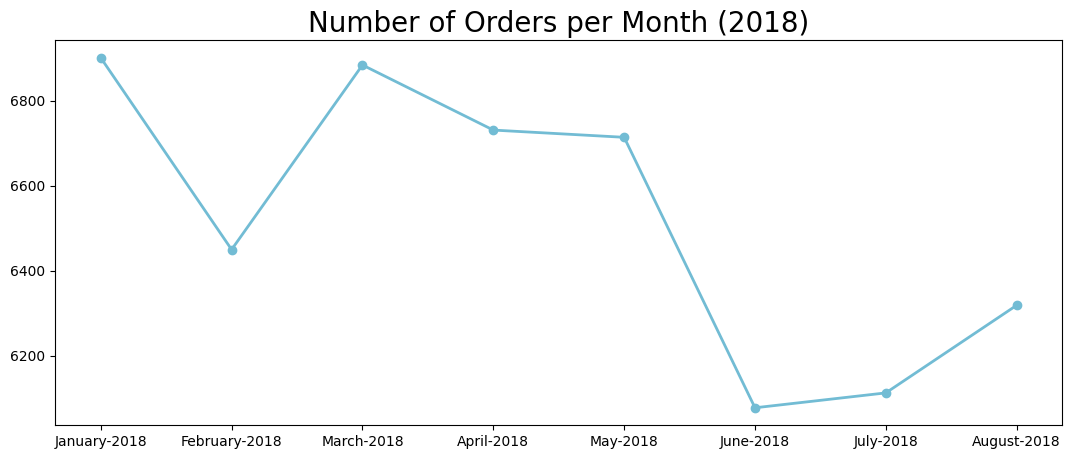

In [150]:
plt.figure(figsize=(13, 5))
plt.plot(
    monthly_orders_2018_df["order_purchase_timestamp"],
    monthly_orders_2018_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

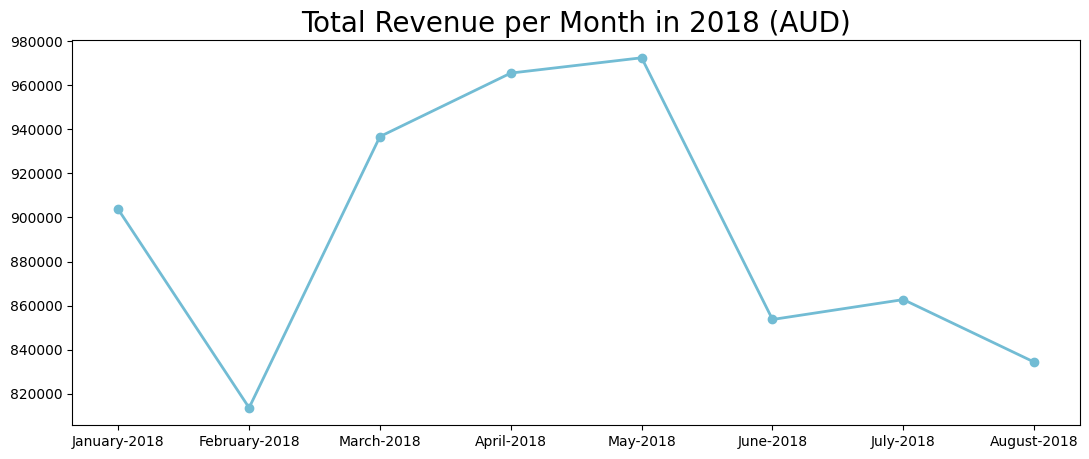

In [151]:
plt.figure(figsize=(13, 5))
plt.plot(
    monthly_orders_2018_df["order_purchase_timestamp"],
    monthly_orders_2018_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month in 2018 (AUD)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

dari kedua grafik tersebut dapat dilihat bahwa performa penjualan e-commerce mengalami penurunan pada bulan february dan june. Hal ini konsisten antara jumlah penjualan dan pendapatan yang diterima oleh e-commerce

### Pertanyaan 2: Kategori produk apa yang paling banyak dan sedikit terjual?

In [152]:
sum_order_items_df = all_df.groupby("product_category_name_english").product_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name_english,product_id
0,bed_bath_table,10953
1,health_beauty,9465
2,sports_leisure,8431
3,furniture_decor,8160
4,computers_accessories,7644
5,housewares,6795
6,watches_gifts,5859
7,telephony,4430
8,garden_tools,4268
9,auto,4140


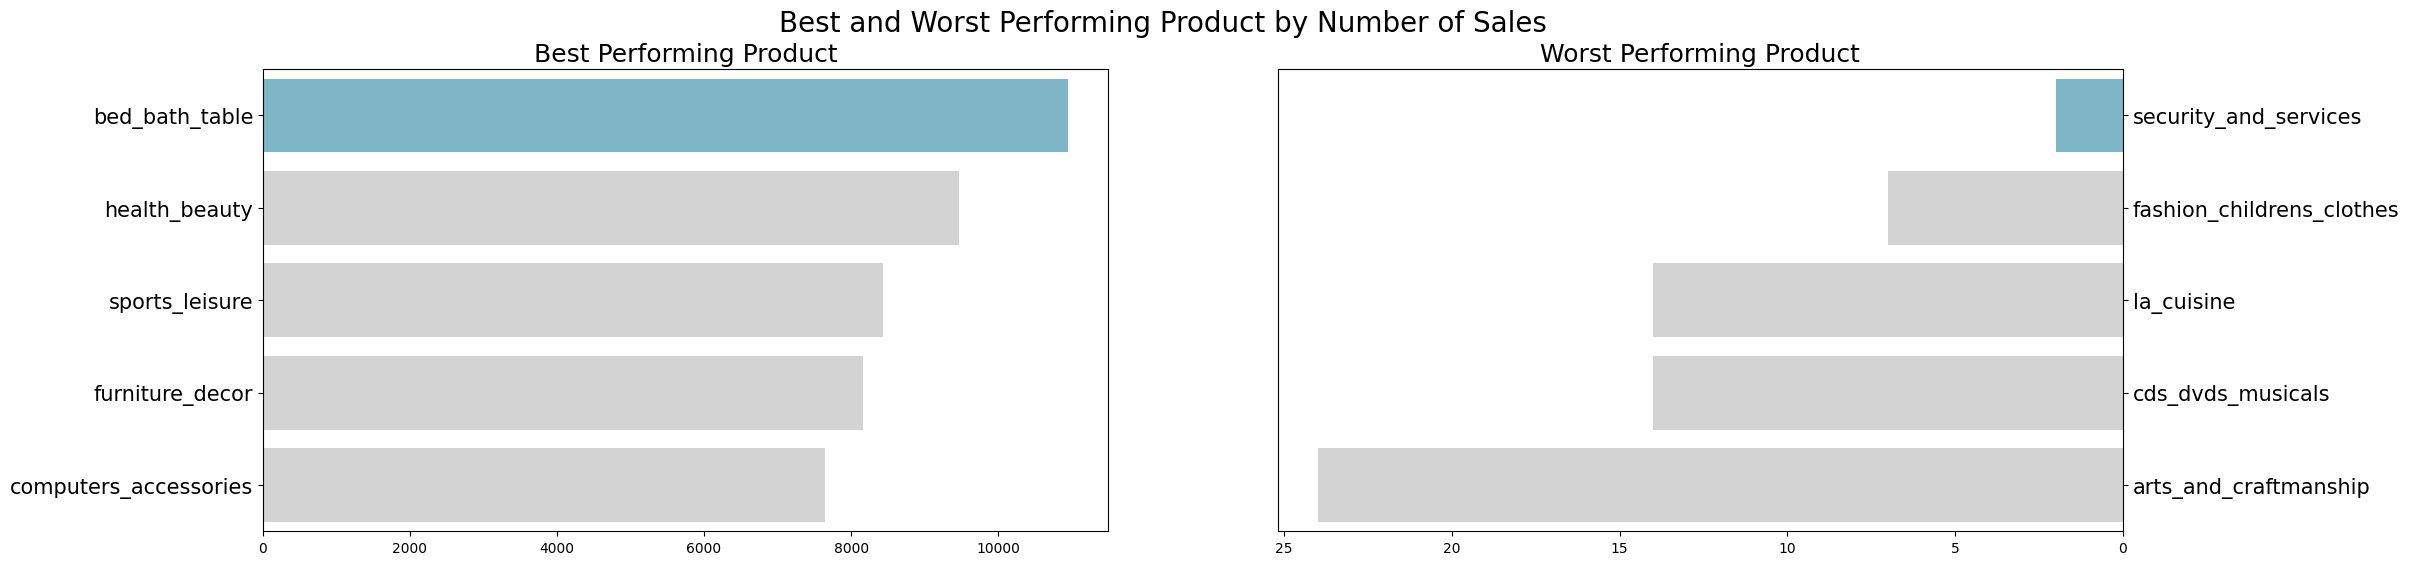

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

dapat dilihat untuk kategori produk yang paling banyak dan sedikit terjual berturut-turut yaitu adalah bed_bath_table dan security_and_services

### Pertanyaan 3: Bagaimana persebaran daerah dari customer yang kita miliki?
pertanyaan ini termasuk analisis lanjutan geoanalysis untuk melihat bagaimana persebaran daerah customer yang kita miliki 

untuk menggambarkan persebaran daerah customer, kita menggunakan pustakan geopandas. Geopandas adalah pustaka Python yang memungkinkan pengguna untuk melakukan analisis geospasial, yaitu analisis data yang berhubungan dengan lokasi geografis. Sebagai persiapannya, kita harus menggabungkan data customer dengan geolocation untuk mendapatkan posisi lat dan lng dari masing-masing customer. Lalu data tersebut dikonversi menjadi GeoDataFrame menggunakan pustakan geopandas. Terakhir, kita menggunakan fungsi visualisasi geopandas untuk membuat peta yang menampilkan persebaran data pelanggan.

In [154]:
# Menggabungkan data pelanggan dengan data geolocation berdasarkan zip_code
customers_geo_df = pd.merge(customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [155]:
# Ubah DataFrame menjadi GeoDataFrame dengan menggunakan koordinat sebagai geometri
geometry = [Point(xy) for xy in zip(customers_geo_df.geolocation_lng, customers_geo_df.geolocation_lat)]
customers_geo_df = gpd.GeoDataFrame(customers_geo_df, crs="EPSG:4326", geometry=geometry)

C:\Users\user\AppData\Local\Temp\ipykernel_30412\3667632412.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


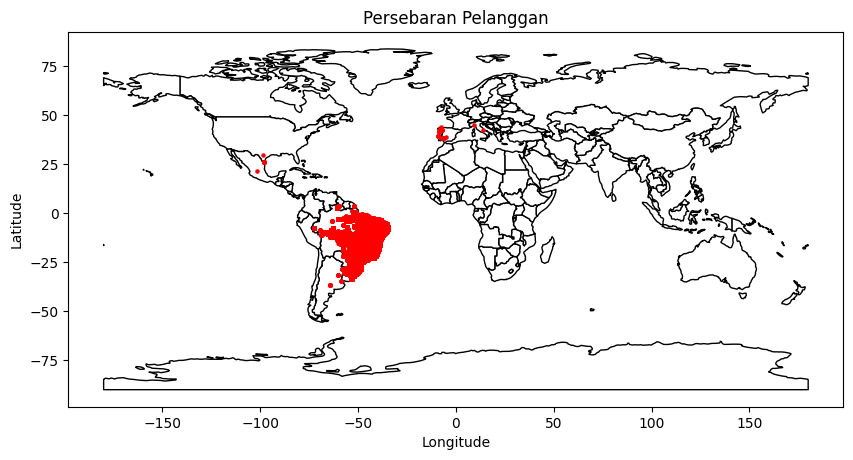

In [156]:
# Visualisasikan persebaran pelanggan
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(10, 10))
customers_geo_df.plot(ax=ax, color='red', markersize=5)
plt.title('Persebaran Pelanggan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Conclusion

- Setelah melihat performa penjualan e-commerce beberapa bulan terakhir, dapat dilihat total penjualan dan revenue yang didapatkan oleh e-commerce. Terjadi penurunan performa penjualan secara signifikan pada bulan february dan june. Serta penjualan tertinggi diraih pada bulan may.
- Kategori produk yang paling banyak terjual di e-commerce adalah kategori bed_bath_table yang hampir mencapai 11k penjualan. Serta kategori produk dengan penjualan paling sedikit adalah security_and_services yang hanya terjual 2 produk
- Persebaran daerah dari customer kebanyakan berada di amerika selatan dan berpusat di negara brazil. Serta kota paling banyak ditempati oleh customer adalah kota sao paulo